In [1]:
import numpy as np
import matplotlib.pyplot as plt
# np.random.seed(0)
round = 25
n_rep = 10

def branin(x1, x2):
    y = float(
        (x2 - 5.1 / (4 * np.pi**2) * x1**2 + 5.0 / np.pi * x1 - 6.0) ** 2
        + 10 * (1 - 1.0 / (8 * np.pi)) * np.cos(x1)
        + 10
    )
    return y

In [25]:
# random search for the minimum of branin function 
obj = []
for i in range(n_rep):
    x1 = np.random.uniform(-5, 10, round)
    x2 = np.random.uniform(0, 15, round)
    y = np.array([branin(x1[i], x2[i]) for i in range(round)])
    # save each y to obj
    obj.append(y)

    # min_idx = np.argmin(y)
    # print(f"Minimum value: {y[min_idx]}")
    # print(f"Minimizer: x1 = {x1[min_idx]}, x2 = {x2[min_idx]}")


In [26]:
# save obj to csv file 
np.savetxt("xx-random.csv", obj)
# read csv file
obj = np.loadtxt("xx-random.csv")

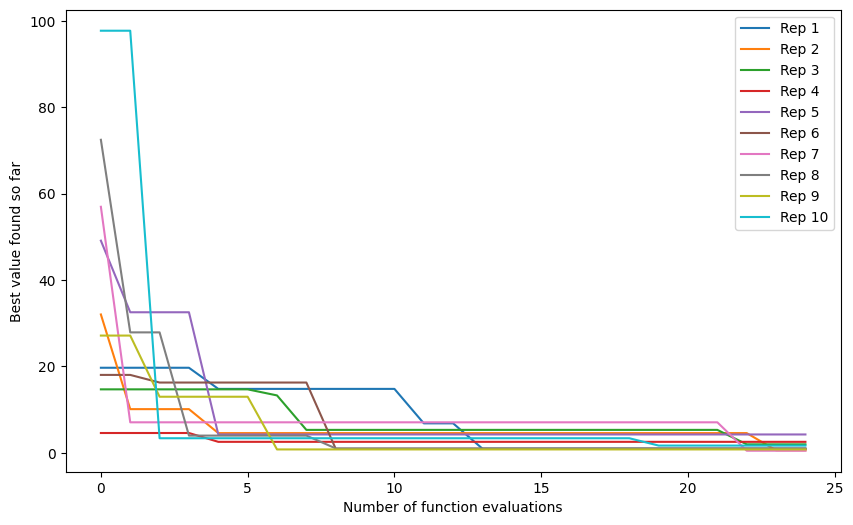

In [29]:
# plot each repeat
plt.figure(figsize=(10, 6))
for i in range(n_rep):
    plt.plot(np.minimum.accumulate(obj[i]), label=f"Rep {i+1}")

plt.xlabel("Number of function evaluations")
plt.ylabel("Best value found so far")
plt.legend()

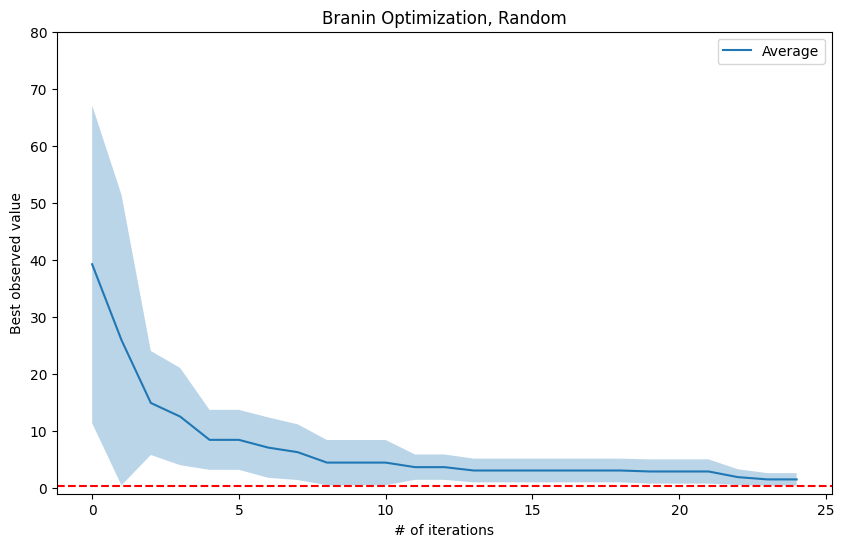

In [30]:
obj = np.array(obj)
best = np.minimum.accumulate(obj, axis=1)
best_avg = np.mean(best, axis=0)
best_std = np.std(best, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(best_avg, label="Average")
plt.fill_between(np.arange(round), best_avg - best_std, best_avg + best_std, alpha=0.3)
plt.axhline(y=0.397887, c='r', ls='--')  # Actual optimum for this problem

plt.xlabel("# of iterations")
plt.ylabel("Best observed value")
plt.title("Branin Optimization, Random")
plt.ylim(-1, 80)
plt.legend()